**Project definition**: The data set is about ride sharing. There are two companies to ride Uber and Lyft. The dataset was collected in the November and December in the 2018. The dataset consists of 693071 rows and 57 columns.

**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import datetime

**Reading the csv file**

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/rideshare_kaggle.csv',sep=',')

**Showing the dataset**

In [ ]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [ ]:
df.shape

(693071, 57)

In [ ]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

# **Data analysing**

**Checking the NAN values in columns**

In [ ]:
df.isna().sum() 

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [ ]:
#check a price of name cloumn 
df.groupby(['cab_type','name'])['price'].sum()

cab_type  name        
Lyft      Lux              910509.50
          Lux Black       1181605.55
          Lux Black XL    1656124.55
          Lyft             492413.68
          Lyft XL          784375.20
          Shared           308929.50
Uber      Black           1130758.00
          Black SUV       1668679.50
          Taxi                  0.00
          UberPool         482184.00
          UberX            537997.00
          UberXL           863803.00
          WAV              538013.50
Name: price, dtype: float64

**Replacing NAN with 0**

In [ ]:
df_uber = df[df['cab_type']=="Uber"]
print(df_uber.groupby('name')['price'].sum())
print("\n no nan taxi ",df_uber[df_uber['name']=='Taxi'].shape[0])

# the all missing data from name = taxi 
# the rest of data is clean

df.fillna(0,inplace=True) #replacing NAN with 0

name
Black        1130758.0
Black SUV    1668679.5
Taxi               0.0
UberPool      482184.0
UberX         537997.0
UberXL        863803.0
WAV           538013.5
Name: price, dtype: float64

 no nan taxi  55095


In [ ]:
list = [x.lower() for x in (df['name'].unique()) ]
list

['shared',
 'lux',
 'lyft',
 'lux black xl',
 'lyft xl',
 'lux black',
 'uberxl',
 'black',
 'uberx',
 'wav',
 'black suv',
 'uberpool',
 'taxi']

# **Making dictionary & list comprehension**

In [ ]:
df['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [ ]:
type_rides = {}
type_price = {}
type_distance = {}

s = len(df['cab_type'].value_counts())
for i in range(s):
  type_rides[df['cab_type'].value_counts().index[i]] = df['cab_type'].value_counts()[i]
  type_price[df['cab_type'].value_counts().index[i]] = int(df[df['cab_type'] == df['cab_type'].value_counts().index[i]]['price'].sum())
  type_distance[df['cab_type'].value_counts().index[i]] = int(df[df['cab_type'] == df['cab_type'].value_counts().index[i]]['distance'].sum())

print(f'Dictionary 1 : {type_rides}   Cab type with numbers of rides (times)')
print(f'Dictionary 2 : {type_price} Cab type with total price ($)')
print(f'Dictionary 3 : {type_distance}   Cab type with total distance (miles)')

Dictionary 1 : {'Uber': 385663, 'Lyft': 307408}   Cab type with numbers of rides (times)
Dictionary 2 : {'Uber': 5221435, 'Lyft': 5333957} Cab type with total price ($)
Dictionary 3 : {'Uber': 845136, 'Lyft': 672293}   Cab type with total distance (miles)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        693071 non-null  float64
 13 

In [ ]:
df.iloc[0]

id                             424553bb-7174-41ea-aeb4-fe06d4f4b9d7
timestamp                                             1544952607.89
hour                                                              9
day                                                              16
month                                                            12
datetime                                        2018-12-16 09:30:07
timezone                                           America/New_York
source                                             Haymarket Square
destination                                           North Station
cab_type                                                       Lyft
product_id                                                lyft_line
name                                                         Shared
price                                                           5.0
distance                                                       0.44
surge_multiplier                                

**The oldest date in the data set**

In [ ]:
df['datetime'].min()

'2018-11-26 03:40:46'

**The newest date in the data set**

In [ ]:
df['datetime'].max()

'2018-12-18 19:15:10'

**The minimum and mximum distance in mile**

In [ ]:
df['distance'].min() #mile

0.02

In [ ]:
df['distance'].max() #mile

7.86

# **List comperhensive**

In [ ]:
list = [x.lower() for x in (df['name'].unique())]
print(f"List comprehension - name  : {list}")

List comprehension - name  : ['shared', 'lux', 'lyft', 'lux black xl', 'lyft xl', 'lux black', 'uberxl', 'black', 'uberx', 'wav', 'black suv', 'uberpool', 'taxi']


In [ ]:
df['date'] = pd.DatetimeIndex(df['datetime']).date

df['hour'] = pd.DatetimeIndex(df['datetime']).hour

**Number of rides during the parts of the day**

In [ ]:
df['day-night'] = pd.cut(x=df['hour'],
                              bins = [0,10,15,19,23],
                              labels = ['Morning','Afternoon','Evening','Night'])

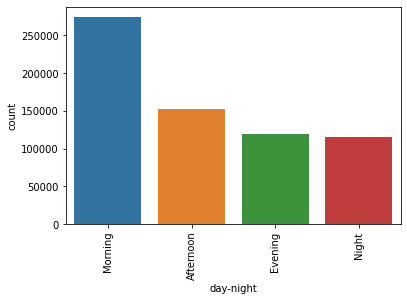

In [ ]:
sns.countplot(x=df['day-night'])
plt.xticks(rotation=90);



**List of timestamp in the dataset**




# **Creating *Improving* class**

In [ ]:
class Improving:
    CONVERSION_FACTOR = 1.60934

    def __init__(self, dis):
        self.dis = dis
    
    def to_datetime(self, timestamp):
        return datetime.datetime.fromtimestamp(timestamp)

    def miles_to_km(self):
        kilometers = self.dis * self.CONVERSION_FACTOR
        return kilometers

    def distance_state(self):
      if (self.dis>=0.02)&(self.dis<3):
        return('short')
      elif (self.dis>=3) &(self.dis<6):
        return('medium')
      else:
        return('long')

In [ ]:
df['datetime'].value_counts()

2018-11-26 23:21:14    156
2018-11-29 01:02:08    156
2018-11-26 23:33:14    156
2018-11-28 15:56:08    156
2018-11-28 14:29:08    156
                      ... 
2018-12-01 14:18:01      6
2018-12-16 12:55:06      4
2018-11-28 09:32:17      3
2018-12-13 15:10:13      1
2018-11-30 13:17:58      1
Name: datetime, Length: 31350, dtype: int64

In [ ]:
df['timestamp'].value_counts()

1.545000e+09    461
1.543431e+09    156
1.543442e+09    156
1.543415e+09    156
1.543412e+09    156
               ... 
1.544976e+09      1
1.543441e+09      1
1.543866e+09      1
1.544697e+09      1
1.544953e+09      1
Name: timestamp, Length: 36179, dtype: int64

In [ ]:
intDateList = ['timestamp',
               'temperatureHighTime',
               'temperatureLowTime',
               'apparentTemperatureHighTime',
               'apparentTemperatureLowTime',
               'sunriseTime',
               'sunsetTime',
               'windGustTime'
]

# **Creating a function to convert the time to timestamp type**

In [ ]:
def convert_to_datetime(timestamp):
    imp = Improving(10)
    return imp.to_datetime(timestamp)

for d in intDateList:
  df[d] = df[d].apply(convert_to_datetime)

In [ ]:
df[['sunriseTime']].head()

,sunriseTime
0,2018-12-16 12:08:04
1,2018-11-26 11:49:29
2,2018-11-27 11:50:37
3,2018-11-29 11:52:50
4,2018-11-28 11:51:44


# **Creating a function to convert the distance unit from mile to Km**

In [ ]:
def convert_distance(dis):
    imp = Improving(dis)
    return imp.miles_to_km()

# Apply the function to the 'distance_miles' column
df['distance_km'] = df['distance'].apply(convert_distance)
df[['distance_km','distance']].sample(4)

,distance_km,distance
125850,4.506152,2.80
93229,4.924580,3.06
222563,0.997791,0.62
225493,0.692016,0.43


In [ ]:
def distance_state(dis):
    imp = Improving(dis)
    return imp.distance_state()

# Apply the function to the 'distance_miles' column
df['distance_state'] = df['distance'].apply(distance_state)

In [ ]:
df[['distance_state','distance']].sample(5)

,distance_state,distance
382728,medium,4.33
422218,short,2.46
65291,medium,4.74
34842,medium,3.30
578717,short,1.80


# **Data vizualization** 




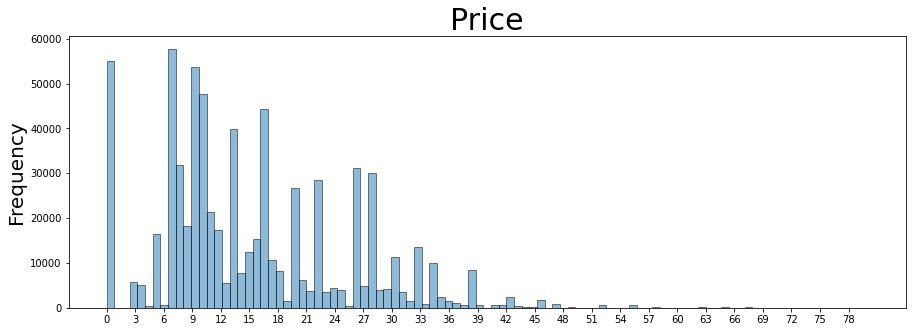

In [ ]:
bins = np.linspace(0, 80,100)
plt.figure(figsize=(15,5))
plt.xticks(np.arange(0, 80, 3))
plt.title('Price',fontsize=30)
plt.ylabel('Frequency',fontsize=20)
plt.hist(df['price'], bins, alpha=0.5, histtype='bar', ec='black')

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.show() 

In [ ]:
df['price'].value_counts()

0.00     55095
7.00     52314
16.50    44351
10.50    40590
13.50    33707
         ...  
89.50        1
81.50        1
64.50        1
87.00        1
19.35        1
Name: price, Length: 148, dtype: int64

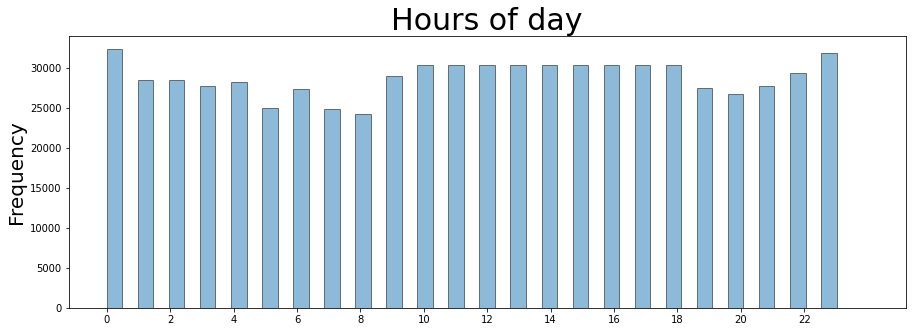

In [ ]:
bins = np.linspace(0, 24)
plt.figure(figsize=(15,5))
plt.xticks(np.arange(0, 24, 2))
plt.title('Hours of day',fontsize=30)
plt.ylabel('Frequency',fontsize=20)
plt.hist(df['hour'], bins, alpha=0.5, histtype='bar', ec='black')

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.show()

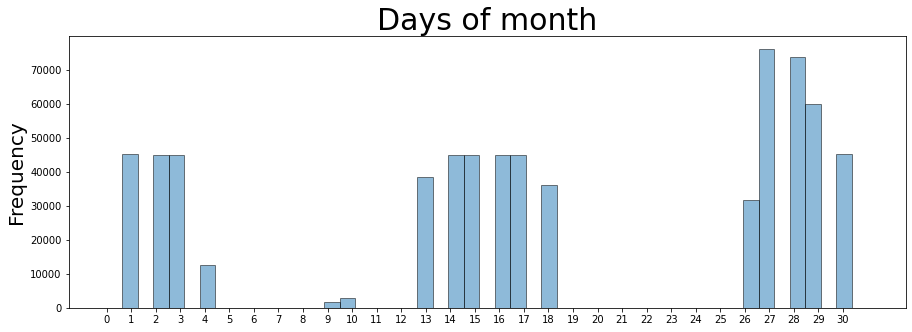

In [ ]:
bins = np.linspace(0, 31)
plt.figure(figsize=(15,5))
plt.xticks(np.arange(0, 31, 1))
plt.title('Days of month',fontsize=30)
plt.ylabel('Frequency',fontsize=20)
plt.hist(df['day'], bins, alpha=0.5, histtype='bar', ec='black')

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 10) 
plt.show()

In [ ]:
df['day'].value_counts()

27    76121
28    73691
29    59974
1     45240
30    45084
16    44928
15    44928
14    44928
3     44928
2     44928
17    44928
13    38531
18    36192
26    31587
4     12636
10     2773
9      1674
Name: day, dtype: int64

**The percentage of ride in the year**

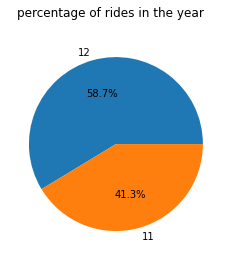

In [ ]:
counts = df['month'].value_counts()
# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.suptitle("percentage of rides in the year")
plt.show()

**The percentage of number of rides for Uber & Lyft**

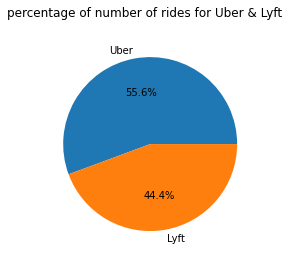

In [ ]:
counts = df['cab_type'].value_counts()
# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.suptitle("percentage of number of rides for Uber & Lyft")
plt.show()

**The average price by distance according to the Lyft and Uber in general**

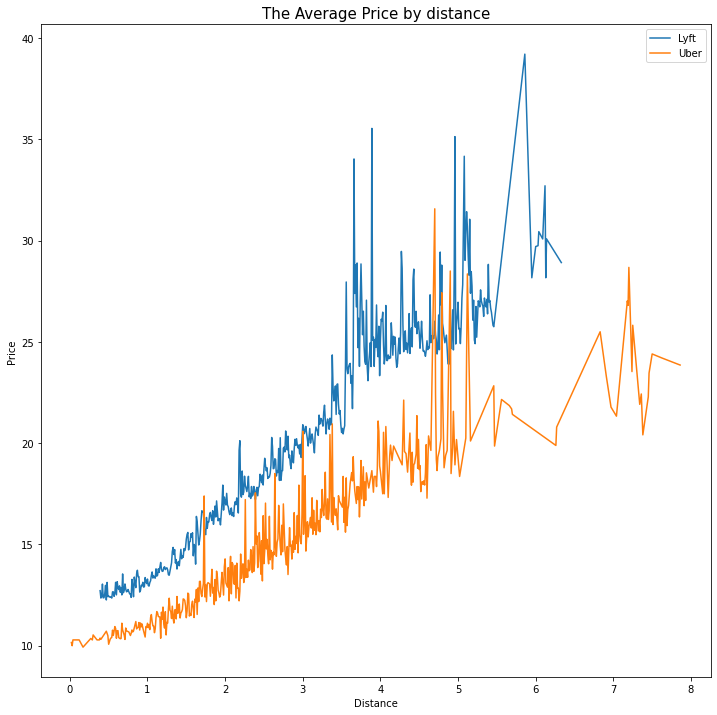

In [ ]:
fig , ax = plt.subplots(figsize = (12,12))
ax.plot(df[df['cab_type'] == 'Lyft'].groupby('distance').price.mean().index, df[df['cab_type'] == 'Lyft'].groupby('distance')['price'].mean(), label = 'Lyft')
ax.plot(df[df['cab_type'] == 'Uber'].groupby('distance').price.mean().index, df[df['cab_type'] =='Uber'].groupby('distance').price.mean(), label = 'Uber')
ax.set_title('The Average Price by distance', fontsize= 15)
ax.set(xlabel = 'Distance', ylabel = 'Price' )
ax.legend()
plt.show()

# change style and colors

**The average price by distance according to the Lyft company**

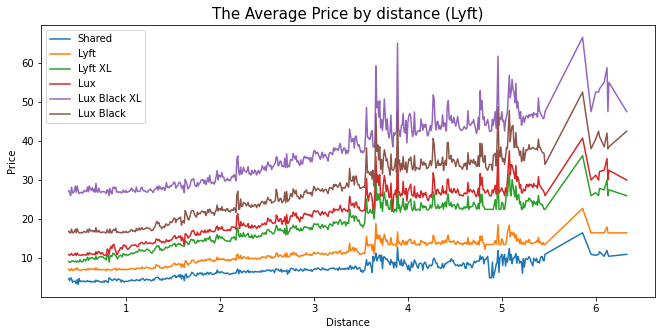

In [ ]:
fig , ax = plt.subplots(figsize = (11,5))
ax.plot(df[df['name'] == "Shared"].groupby('distance').price.mean().index, df[df['name'] == "Shared"].groupby('distance')['price'].mean(), label = 'Shared')
ax.plot(df[df['name'] == "Lyft"].groupby('distance').price.mean().index, df[df['name'] =="Lyft"].groupby('distance').price.mean(), label = 'Lyft')
ax.plot(df[df['name'] == "Lyft XL"].groupby('distance').price.mean().index, df[df['name'] =="Lyft XL"].groupby('distance').price.mean(), label = 'Lyft XL')
ax.plot(df[df['name'] == "Lux"].groupby('distance').price.mean().index, df[df['name'] == "Lux"].groupby('distance')['price'].mean(), label = 'Lux')
ax.plot(df[df['name'] == "Lux Black XL"].groupby('distance').price.mean().index, df[df['name'] =="Lux Black XL"].groupby('distance').price.mean(), label = 'Lux Black XL')
ax.plot(df[df['name'] == "Lux Black"].groupby('distance').price.mean().index, df[df['name'] =="Lux Black"].groupby('distance').price.mean(), label = 'Lux Black')

 

ax.set_title('The Average Price by distance (Lyft)', fontsize= 15)
ax.set(xlabel = 'Distance', ylabel = 'Price' )
ax.legend()
plt.show()

**The average price by distance according to the Uber company**

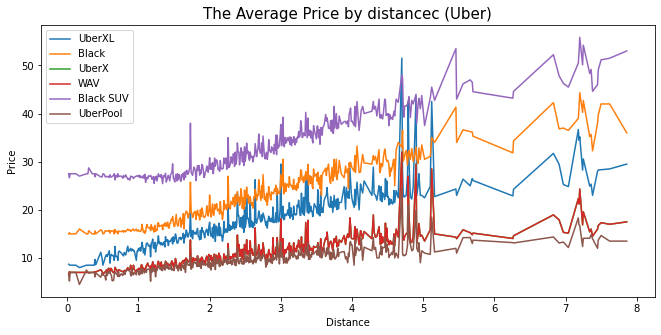

In [ ]:
fig , ax = plt.subplots(figsize = (11,5))

 

ax.plot(df[df['name'] == "UberXL"].groupby('distance').price.mean().index, df[df['name'] == "UberXL"].groupby('distance')['price'].mean(), label = 'UberXL')
ax.plot(df[df['name'] == "Black"].groupby('distance').price.mean().index, df[df['name'] =="Black"].groupby('distance').price.mean(), label = 'Black')
ax.plot(df[df['name'] == "UberX"].groupby('distance').price.mean().index, df[df['name'] =="UberX"].groupby('distance').price.mean(), label = 'UberX')
ax.plot(df[df['name'] == "WAV"].groupby('distance').price.mean().index, df[df['name'] == "WAV"].groupby('distance')['price'].mean(), label = 'WAV')
ax.plot(df[df['name'] == "Black SUV"].groupby('distance').price.mean().index, df[df['name'] =="Black SUV"].groupby('distance').price.mean(), label = 'Black SUV')
ax.plot(df[df['name'] == "UberPool"].groupby('distance').price.mean().index, df[df['name'] =="UberPool"].groupby('distance').price.mean(), label = 'UberPool')

 

ax.set_title('The Average Price by distancec (Uber)', fontsize= 15)
ax.set(xlabel = 'Distance', ylabel = 'Price')
ax.legend()
plt.show()

**Summery of Cab type**

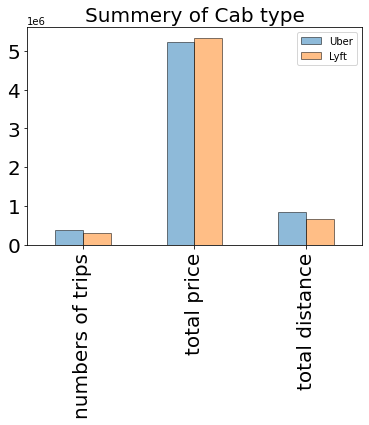

In [ ]:
list = [type_rides,type_price,type_distance]
df_dict = pd.DataFrame(list,index=['numbers of trips','total price','total distance'])

df_dict.plot(kind="bar" , alpha=0.5,  ec='black',fontsize=20)

plt.title("Summery of Cab type" ,fontsize=20)
plt.show()


**The percentage of distance states**



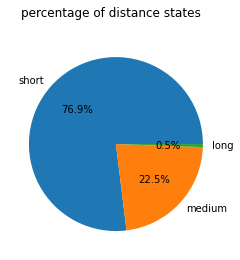

In [ ]:
counts = df['distance_state'].value_counts()
# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.suptitle("percentage of distance states")
plt.show()

**The percentage of wheather state in Nov. & Dec. month**

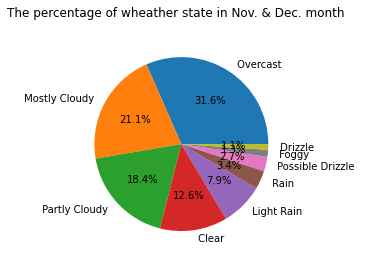

In [ ]:
counts = df['short_summary'].value_counts()
# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.suptitle("The percentage of wheather state in Nov. & Dec. month")
plt.show()


**The frequency of wheather state**


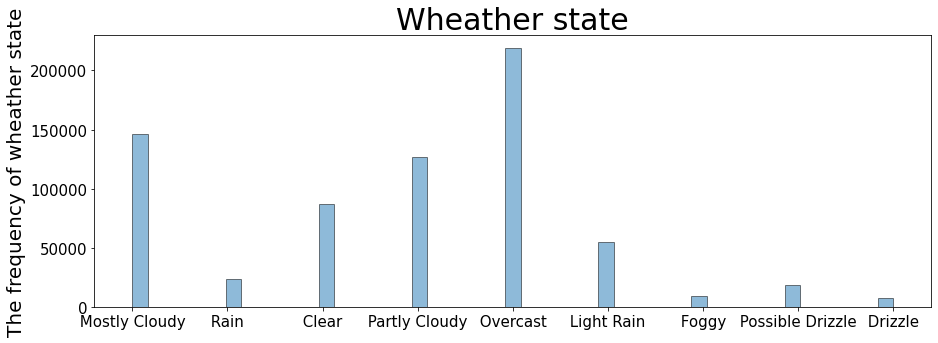

In [ ]:
bins = np.linspace(0, 8)
plt.figure(figsize=(15,5))
plt.xticks(np.arange(0, 10, 1))
plt.title('Wheather state',fontsize=30)
plt.ylabel('The frequency of wheather state',fontsize=20)
plt.hist(df['short_summary'], bins, alpha=0.5, histtype='bar', ec='black')

plt.xticks(fontsize = 15) 
plt.yticks(fontsize = 15) 
plt.show()

**Contributors:**


- Alaa Kreemeldeen Abdelgader (X1721)
- Osamah Khaled Abdulhadi Alselwi (X1524)
- Ahmed Kaoud Ahmed (x1738)
- Eanas Barakat (X1507)
- Subhi Issa (X2027)


24-January-2023
